## Data Analysis and Prediction of confirmed cases for COVID-19 using Machine Learning

In December 2019, a novel coronavirus was found in a seafood wholesale market in Wuhan, China. World Health Organization (WHO) officially named this coronavirus as COVID-19. Since the first patient was hospitalized on
December 12, 2019, China has reported a total of 78,824 confirmed COVID-19 cases and 2,788 deaths as of February 28, 2020. The COVID-19 has been successfully contained in China but is spreading all over the world. COVID-19
epidemic is prone to disrupt and crumble the existing health-care infrastructures in both the developed and developing world. COVID19 also impacts people’s daily life and country’s economic development. In this notebook, we adopt mathematical epidemic models such as Susceptible-Infected-Recovery (SIR) to simulate the epidemic on the data available for the entire world and future projections on the number of infections, deaths in six specific countries (Italy, France, Spain, Germany, USA, and India). In the latter section, we also used statistical machine
learning techniques such as Polynomial regression, support vector machine regression, and simple neural network such as multilayer perceptron to better understand and learns the underlying pattern of the real epidemic growth and the virus proliferation pattern. We found out that the predictions by
the logistic model was underreported, i.e, the actual trajectory is more complex than the logistic model. However, we found out that different models found to be better in modeling the pandemic outbreak in respective countries. We also performed data analysis to project the infection, recovery, and death
statistics from the real data and also calculated the growth factor of pandemic outbreak in the countries and grouping them respectively. To our future projections and analysis, we found out USA, followed by India are gonna be the most affected countries with each resulting into millions of positive infections
cases and deaths.

# Download required libraries
* Sklearn
* Tensorflow
* Keras
* Matplotlib
* Pandas
* Numpy
* Folium
* Pycountry_Convert
* XGBoost
* LightGBM
* Scipy

In [ ]:
!pip install pycountry_convert 
!pip install folium

     |████████████████████████████████| 10.0MB 3.7MB/s 
     |████████████████████████████████| 235kB 39.1MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=53c79d9cb43d37f0101be9d9f2580a6901842e4e0c6b6466cac551b7e3e61064
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Importing libraries

In [ ]:
%cd /content/gdrive/My Drive/Covid19

/content/gdrive/My Drive/Covid19


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

%matplotlib inline

Using TensorFlow backend.


# COVID-19 Data Analysis

In [ ]:
# Retriving Dataset
df_confirm_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19_world = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [ ]:
df_covid19_world['Country_Region']

0               Australia
1                 Austria
2                  Canada
3                   China
4                 Denmark
              ...        
183    West Bank and Gaza
184        Western Sahara
185                 Yemen
186                Zambia
187              Zimbabwe
Name: Country_Region, Length: 188, dtype: object

In [ ]:
df_confirm_cases[df_confirm_cases['Country/Region'] == 'Italy'].columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20',
       '5/15/20', '5/16/20', '5/17/20', '5/18/20'],
      dtype='object', length=122)

In [ ]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,5,5,5,5,5,6,7,7,7,7,7,8,8,8,8
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,4,5,5,7,7,8,9,10,12,12,15,18,20,20,28,30,33,33
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,5,8,12,12,20,20,21,21,23,29,33,36,39,41,41,41,44,44


In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    #plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    plt.tight_layout()
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["Country/Region",country]
    else: 
        params = ["All", "All"]

    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")")

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirm_cases.columns[5]+" - "+df_confirm_cases.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[0]+" "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

In [ ]:
df_countries_cases = df_covid19_world.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["Country_Region"]
df_countries_cases = df_countries_cases.drop(['Country_Region'],axis=1)

#df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
#df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

In [ ]:
df_countries_cases.index
for i, country in enumerate(df_countries_cases.index):
    print(country)

Australia
Austria
Canada
China
Denmark
Finland
France
Germany
Iceland
Ireland
Italy
Netherlands
Norway
Russia
Sweden
Switzerland
United Kingdom
US
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Central African Republic
Chad
Chile
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Gabon
Gambia
Georgia
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
India
Indonesia
Iran
Iraq
Israel
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg


In [ ]:
df_countries_cases.drop(['People_Tested','People_Hospitalized'], axis=1).sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
Country_Region,,,,,,,,
US,1601434.000000,96007.000000,350135.000000,1194984.000000,486.069162,5.995064,840,USA
Russia,335882.000000,3388.000000,107936.000000,224558.000000,230.159484,1.008688,643,RUS
Brazil,330890.000000,21048.000000,135430.000000,174412.000000,155.669420,6.361026,76,BRA
United Kingdom,255544.000000,36475.000000,1142.000000,217927.000000,376.431053,14.273471,826,GBR
Spain,234824.000000,28628.000000,150376.000000,55820.000000,502.245941,12.191258,724,ESP
Italy,228658.000000,32616.000000,136720.000000,59322.000000,378.185721,14.264097,380,ITA
France,182015.000000,28218.000000,63986.000000,89811.000000,278.849712,15.503118,250,FRA
Germany,179730.000000,8241.000000,159364.000000,12125.000000,214.516039,4.585211,276,DEU
Turkey,154500.000000,4276.000000,116111.000000,34113.000000,183.189126,2.767638,792,TUR


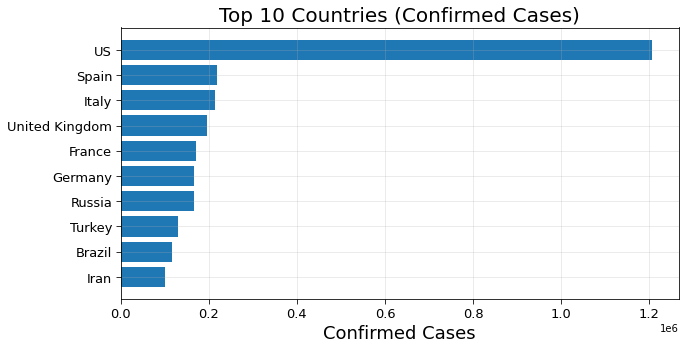

In [ ]:
img = plt.figure(figsize=(10,5))
img.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

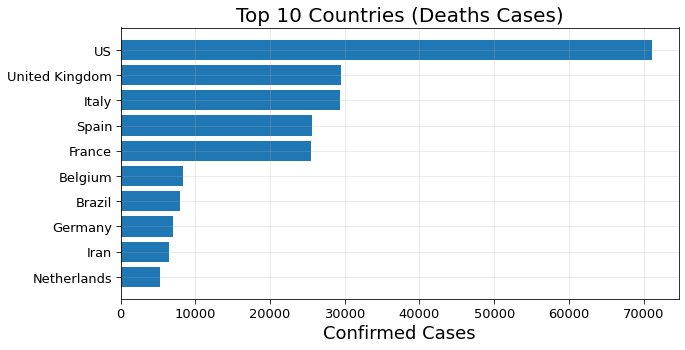

In [ ]:
img = plt.figure(figsize=(10,5))
img.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:])
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

In [ ]:
df_countries_cases.corr().style.background_gradient(cmap='Reds')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning:

All-NaN slice encountered



,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
Confirmed,1.000000,0.930233,0.804741,0.979892,0.175352,nan,nan,0.135623,0.014528
Deaths,0.930233,1.000000,0.780694,0.887308,0.213024,nan,nan,0.263109,0.010835
Recovered,0.804741,0.780694,1.000000,0.672303,0.193029,nan,nan,0.164930,-0.011697
Active,0.979892,0.887308,0.672303,1.000000,0.149521,nan,nan,0.100648,0.022032
Incident_Rate,0.175352,0.213024,0.193029,0.149521,1.000000,nan,nan,0.080751,0.031448
People_Tested,nan,nan,nan,nan,nan,nan,nan,nan,nan
People_Hospitalized,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mortality_Rate,0.135623,0.263109,0.164930,0.100648,0.080751,nan,nan,1.000000,0.165556
UID,0.014528,0.010835,-0.011697,0.022032,0.031448,nan,nan,0.165556,1.000000


In [ ]:
temp = df_confirm_cases.groupby('Country/Region').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirm_cases.columns[-1], ascending= False)

In [ ]:
t=temp.loc[temp.index=='Germany'].values[0]

In [ ]:
len(temp.columns)

105

In [ ]:
temp.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20',
       '5/2/20', '5/3/20', '5/4/20', '5/5/20'],
      dtype='object', length=105)

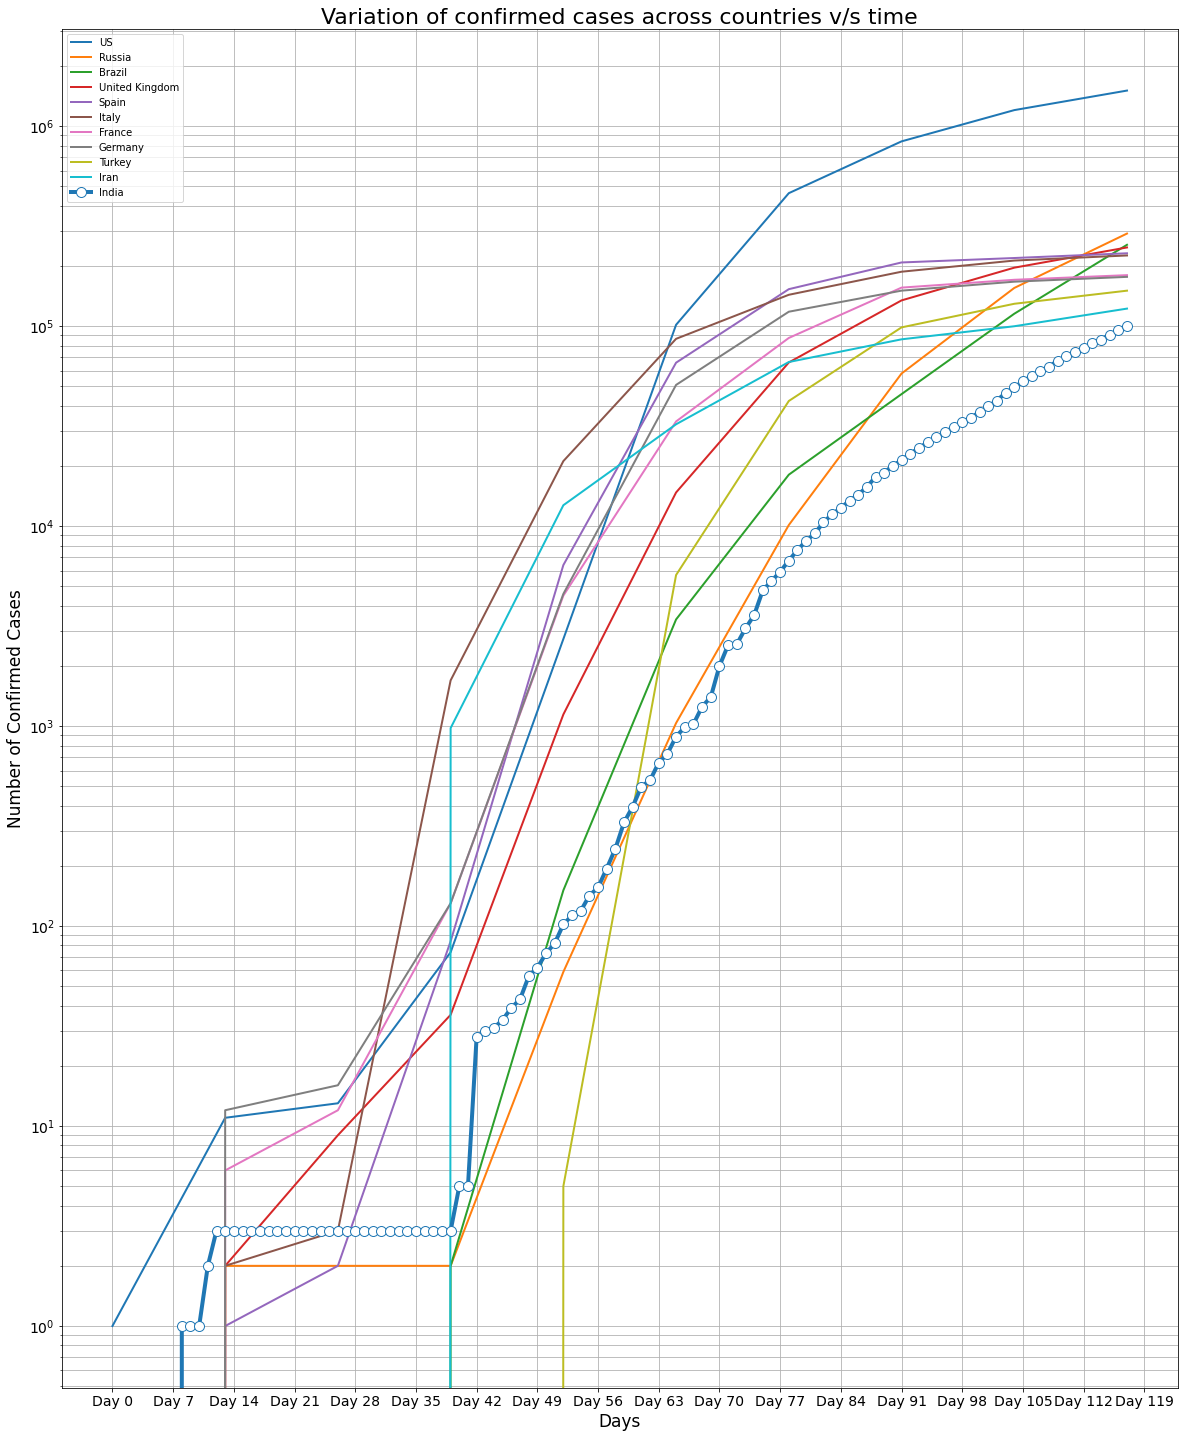

In [ ]:
temp = df_confirm_cases.groupby('Country/Region').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirm_cases.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(20,25))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        if country != "India":
            continue
    x = 122
    t = temp.loc[temp.index== country].values[0]
    #t = t[t>=threshold][:x]
    t=t[:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,label = country,linewidth =2)
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,122,7),[ "Day "+str(i) for i in range(122)][::7])     
'''
# Reference lines 
x = np.arange(0,64)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "red")
plt.annotate("doubles every day",(x[-2],y[-1]),color ="Red", xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,64)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "black")
plt.annotate("doubles every second day",(x[-3],y[-1]), color="Red", xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,64)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "cyan")
plt.annotate("doubles every week",(x[-3],y[-1]),color="Red", xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,64)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("doubles every month",(x[-3],y[-1]), color="Red", xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,64)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "blue")
plt.annotate("doubles every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)
'''
# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Variation of confirmed cases across countries v/s time",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig('Trend_comp_may.png')
plt.show()

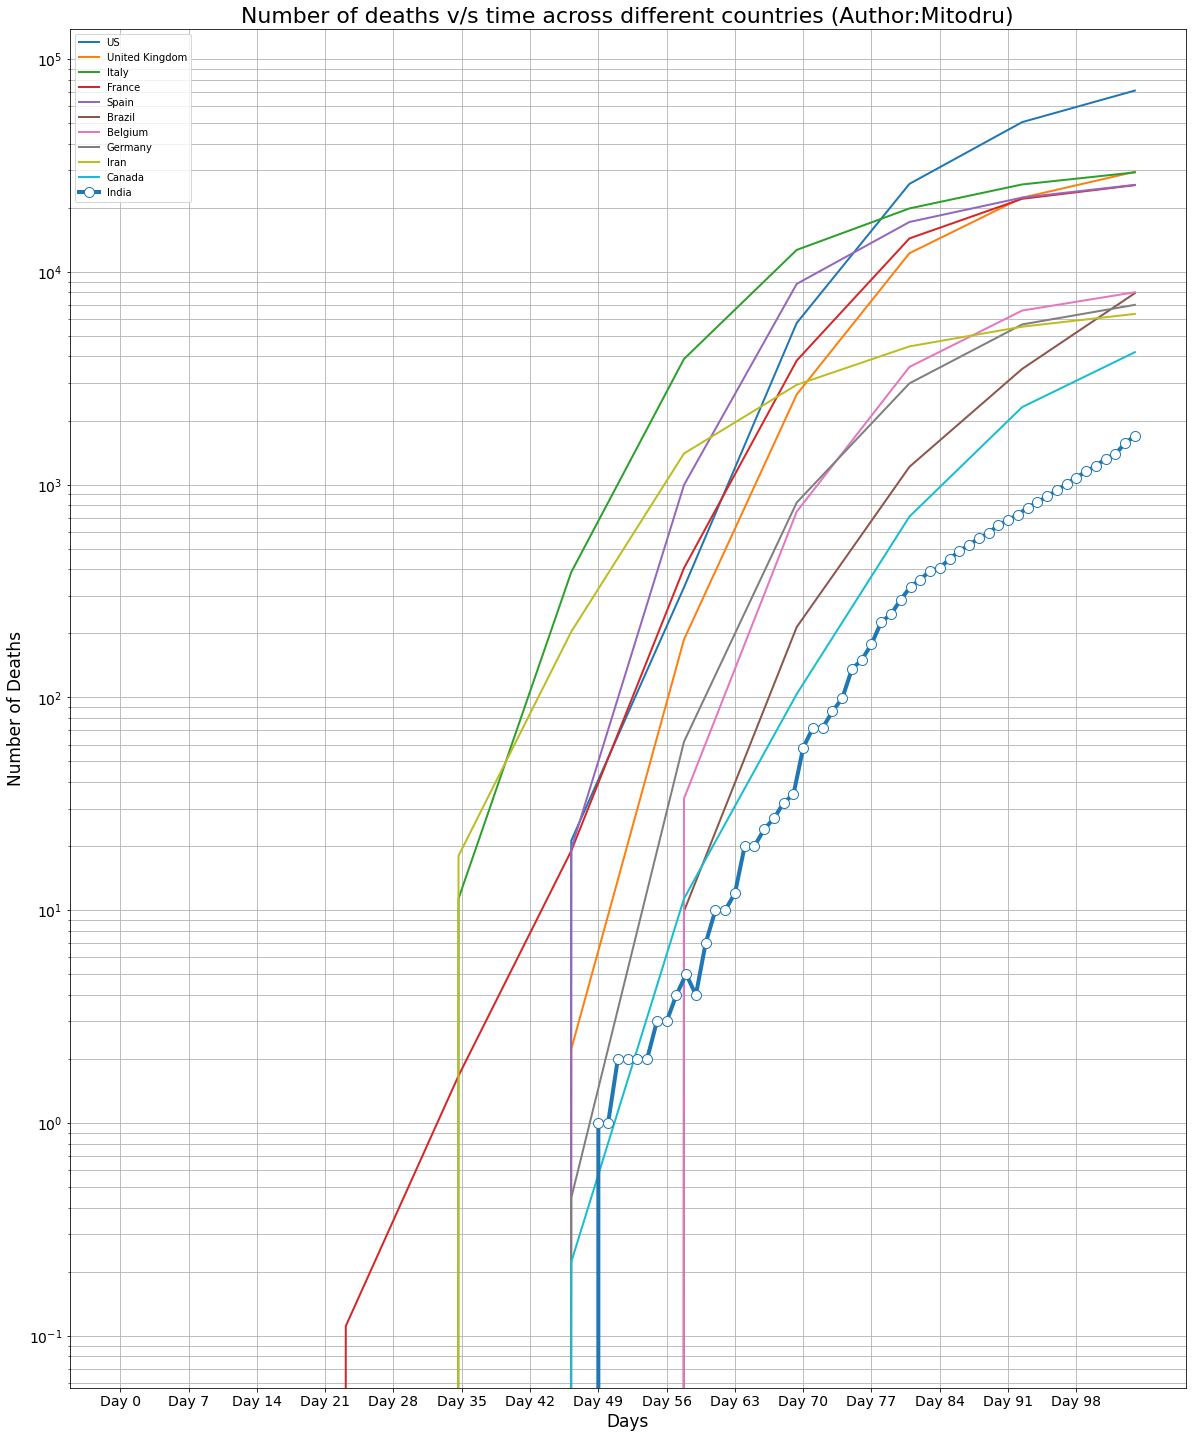

In [ ]:
temp = df_deaths.groupby('Country/Region').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirm_cases.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(20,25))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        if country != "India":
            continue
        
    x = 105
    t = temp.loc[temp.index== country].values[0]
    #t = t[t>threshold][:x]
    t=t[:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,label = country,linewidth =2)
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,105,7),[ "Day "+str(i) for i in range(105)][::7])     
'''
# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "red")
plt.annotate("doubles every day",(x[-2],y[-1]),color="Red", xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "black")
plt.annotate("doubles every second day",(x[-3],y[-1]),color="Red", xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "cyan")
plt.annotate("doubles every week",(x[-3],y[-1]), color="Red", xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("doubles every month",(x[-3],y[-1]), color="Red", xycoords="data",fontsize=14,alpha = 0.5)

# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "blue")
plt.annotate("doubles every 4 days",(x[-3],y[-1]), color="Red",xycoords="data",fontsize=14,alpha = 0.8)
'''

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Number of deaths v/s time across different countries (Author:Mitodru)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig('Trend Comparision with India.png')
plt.show()

In [ ]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirm_cases)):
    folium.Circle(
        location=[df_confirm_cases.iloc[i]['Lat'], df_confirm_cases.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirm_cases.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirm_cases.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirm_cases.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirm_cases.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirm_cases.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [ ]:
world_map.save('visualization_mortality_conf.html')

In [ ]:
df_countries_cases

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
Country_Region,,,,,,,,,,
Australia,7111.0,102.0,6494.0,515.0,27.930416,NaN,NaN,1.434397,36,AUS
Austria,16436.0,635.0,15005.0,796.0,182.492450,NaN,NaN,3.863470,40,AUT
Canada,83947.0,6360.0,42608.0,34979.0,221.755233,NaN,NaN,7.576209,124,CAN
China,84081.0,4638.0,79332.0,111.0,5.985792,NaN,NaN,5.516109,156,CHN
Denmark,11428.0,561.0,9962.0,905.0,197.299715,NaN,NaN,4.908995,208,DNK
...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,423.0,2.0,346.0,75.0,8.291815,NaN,NaN,0.472813,275,PSE
Western Sahara,6.0,0.0,6.0,0.0,1.004470,NaN,NaN,0.000000,732,ESH
Yemen,209.0,33.0,11.0,165.0,0.700732,NaN,NaN,15.789474,887,YEM


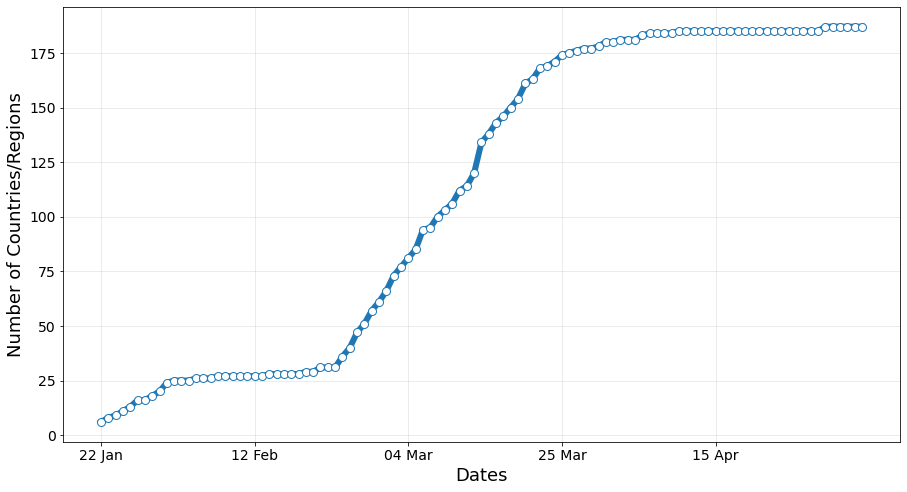

In [ ]:
case_nums_country = df_confirm_cases.groupby("Country/Region").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)

marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=18)
plt.grid(alpha = 0.3)
plt.savefig('spread.png')

In [ ]:
case_nums_country

1/22/20      6
1/23/20      8
1/24/20      9
1/25/20     11
1/26/20     13
          ... 
5/1/20     187
5/2/20     187
5/3/20     187
5/4/20     187
5/5/20     187
Length: 105, dtype: int64

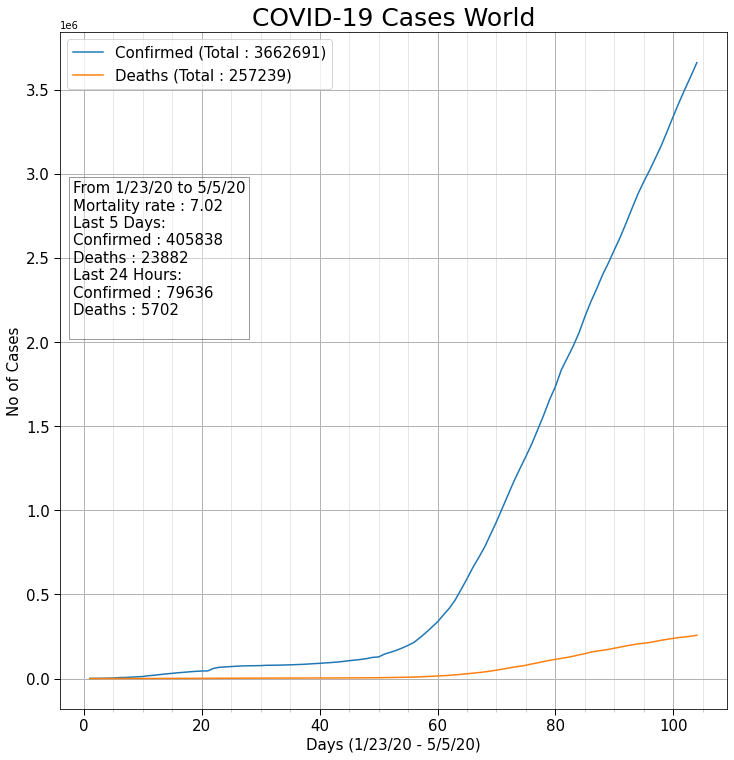

In [ ]:
cols = 1
rows = 1
f = plt.figure(figsize=(15,12))
visualize_covid_cases(df_confirm_cases, df_deaths,continent = "All",figure = [f,rows,cols, 1])

plt.savefig('COIVD-19-World.png')

plt.show()

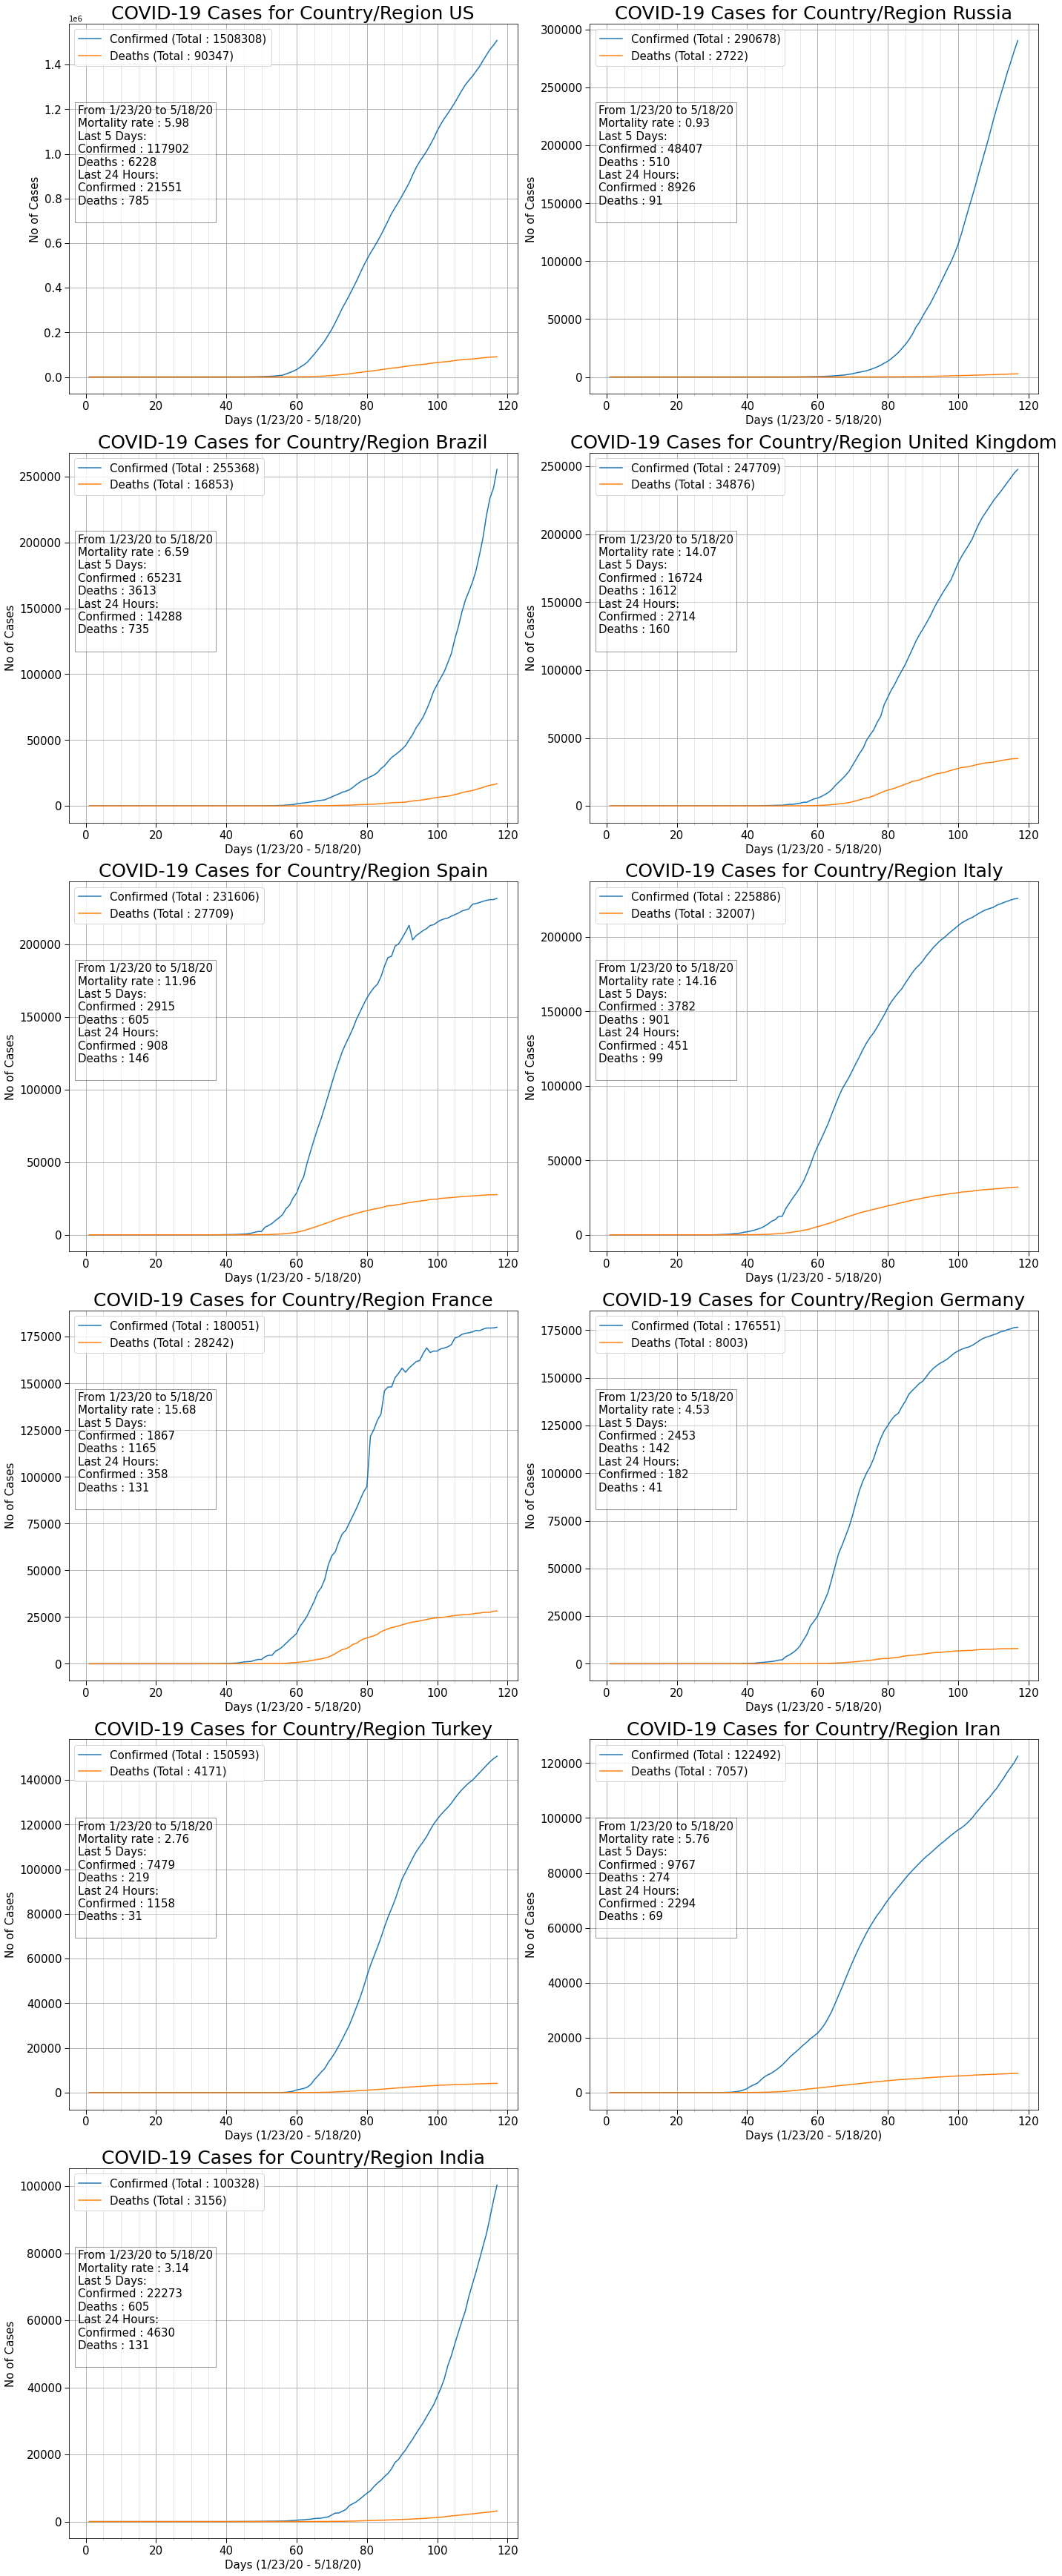

In [ ]:
df_countries = df_confirm_cases.groupby(["Country/Region"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 100000].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirm_cases, df_deaths, country = country,figure = [f,rows,cols, i+1])
plt.savefig('Most affected countires.png')
plt.show()

In [ ]:
df_countries[df_countries.columns[-1]]

Country/Region
US                  1508308
Russia               290678
Brazil               255368
United Kingdom       247709
Spain                231606
                     ...   
Seychelles               11
MS Zaandam                9
Papua New Guinea          8
Western Sahara            6
Lesotho                   1
Name: 5/18/20, Length: 188, dtype: int64

In [ ]:
df_countries[df_countries[df_countries.columns[-1]] >= 700]

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657,121478
Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999
Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235
Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695
France,44.4772,116.0351,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,288,380,656,959,1136,1219,1794,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105
Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408
United Kingdom,321.8262,-423.4011,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,86,116,164,207,274,322,384,459,459,802,1144,1145,1551,1960,2642,2716,4014,5067,5745,6726,8164,9640,11812,14745,17312
Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,8,18,27,42,56,90,114,214,268,337,374,491,652,652,1139,1359,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877,10897,11811,12928,14076


In [ ]:
df_countries[df_countries[df_countries.columns[-1]] >= 700].index


Index(['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Korea, South', 'Netherlands',
       'Austria', 'Belgium', 'Turkey', 'Canada', 'Portugal', 'Norway',
       'Brazil', 'Australia', 'Sweden', 'Israel', 'Czechia', 'Denmark',
       'Malaysia', 'Ireland', 'Chile', 'Luxembourg', 'Ecuador', 'Japan',
       'Poland', 'Pakistan', 'Romania', 'South Africa', 'Thailand',
       'Saudi Arabia', 'Indonesia', 'Finland', 'Russia', 'Greece', 'Iceland',
       'India', 'Philippines', 'Singapore', 'Diamond Princess'],
      dtype='object', name='Country/Region')

In [ ]:
pop_italy = 60486683
df_countries_cases[df_countries_cases.index== 'Italy']

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Italy,97689,10779,13030,73880


In [ ]:
(pop_italy-df_countries_cases[df_countries_cases.index== 'Italy']['Confirmed']-df_countries_cases[df_countries_cases.index== 'Italy']['Recovered']-df_countries_cases[df_countries_cases.index== 'Italy']['Deaths'])/pop_italy

Country_Region
Italy    0.997991
dtype: float64

In [ ]:
R1=0
type(R1)

int

In [ ]:
df_countries_cases.Confirmed

Country_Region
Australia              3980
Austria                8743
Canada                 6243
China                 82122
Denmark                2564
                      ...  
Venezuela               119
Vietnam                 188
West Bank and Gaza      108
Zambia                   29
Zimbabwe                  7
Name: Confirmed, Length: 177, dtype: int64

# SIR modelling

Country_Region
Italy    23809
dtype: int64


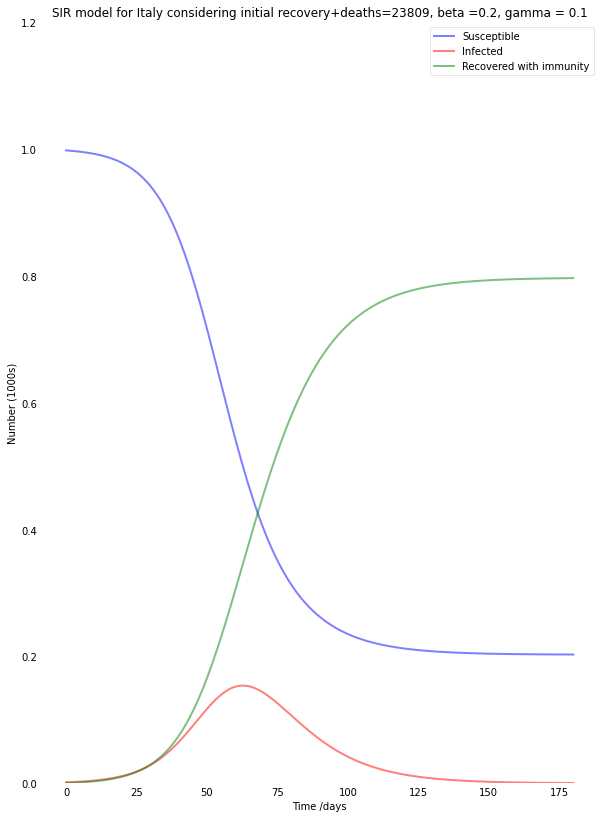

In [ ]:
from scipy.integrate import odeint
from scipy import integrate, optimize
import matplotlib.pyplot as plt

pop_italy = 60486683
pop_spain = 46749696
pop_UK = 67784927
pop_singapore = 5837230
N = pop_italy
I0 = df_countries_cases[df_countries_cases.index== 'Italy']['Confirmed']
#R0 = 0
R0= df_countries_cases[df_countries_cases.index== 'Italy']['Recovered'] + df_countries_cases[df_countries_cases.index =='Italy']['Deaths']
print(R0)
R0=R0.item()
#sus0 = N - inf0
#rec0 = 0.0
# Total population, N.
#N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
#I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 180, 180)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize= (10,14))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/pop_italy, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/pop_italy, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/pop_italy, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("SIR model for Italy considering initial recovery+deaths=23809, beta =0.2, gamma = 0.1")
plt.savefig('initial SIR model for Italy.png')

In [ ]:
df_confirm_cases['1/22/20']

555

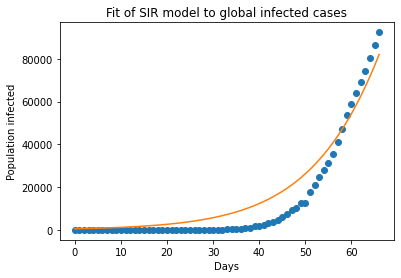

Optimal parameters: beta = 0.7882585209613754  and gamma =  0.7102838330444707


In [ ]:
from scipy.integrate import odeint
from scipy import integrate, optimize
import matplotlib.pyplot as plt

#country_df = total_date_Italy[9:]
#country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [df_italy[col].item() for i, col in enumerate(df_italy.columns[4:])]
xdata = [i for i in range(len(ydata))]
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)


pop_italy = float(60486683)
pop_spain = 46749696
pop_UK = 67784927
pop_singapore = 5837230
N = pop_italy
inf0 = 555.0
#inf0=df_confirm_cases['1/22/20']
#inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0
y0 = sus0, inf0, rec0
def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):

    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]
#ret = odeint(deriv, y0, t, args=(N, beta, gamma))[:,-1]
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model to global infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# Machine Learning Models for Prediction of confirmed cases in future
* Polynomial Regression
* SVM Regression
* Random Forest Regression
* Multilayer Perceptron Neural Network

In [ ]:
pop_italy = 60486683.
pop_spain = 46749696.
pop_UK = 67784927.
pop_singapore = 5837230

In [ ]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,5,5,5,5,5,6,7,7,7,7,7,8,8,8,8
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,4,5,5,7,7,8,9,10,12,12,15,18,20,20,28,30,33,33
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,5,8,12,12,20,20,21,21,23,29,33,36,39,41,41,41,44,44


In [ ]:
df_recoveries.keys()
cols = df_confirm_cases.keys()

confirmed = df_confirm_cases.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
recoveries =df_recoveries.loc[:, cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251,251
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209
263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34,78
264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551


In [ ]:
len(confirmed.keys())

122

In [ ]:
# Aggregating cases for individual countries respectively
dates = confirmed.keys()
#dates = dates[:60]
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = []
germany_cases = []
india_cases =[]
south_korea_cases = [] 
uk_cases = []
france_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(df_confirm_cases[df_confirm_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(df_confirm_cases[df_confirm_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(df_confirm_cases[df_confirm_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(df_confirm_cases[df_confirm_cases['Country/Region']=='Spain'][i].sum())
    germany_cases.append(df_confirm_cases[df_confirm_cases['Country/Region'] == 'Germany'][i].sum())
    india_cases.append(df_confirm_cases[df_confirm_cases['Country/Region'] == 'India'][i].sum())
    south_korea_cases.append(df_confirm_cases[df_confirm_cases['Country/Region'] == 'South Korea'][i].sum())
    uk_cases.append(df_confirm_cases[df_confirm_cases['Country/Region'] == 'United Kingdom'][i].sum())
    france_cases.append(df_confirm_cases[df_confirm_cases['Country/Region'] == 'France'][i].sum())

In [ ]:
# Future forcasting
days_in_future = 30
days_till_train =60
future_forcast = np.array([i for i in range(days_till_train + days_in_future)]).reshape(-1, 1)
train_dates = future_forcast[:-days_in_future]

In [ ]:
len(train_dates)

60

In [ ]:
# Functions to calculate daily increase cases for countries
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
germany_daily_increase = daily_increase(germany_cases)
india_daily_increase = daily_increase(india_cases)
south_korea_daily_increase = daily_increase(south_korea_cases)
uk_daily_increase = daily_increase(uk_cases)
france_daily_increase = daily_increase(france_cases)

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
len(days_since_1_22)
#len(dates)

122

In [ ]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
len(future_forcast)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor
from sklearn.pipeline import make_pipeline

In [ ]:
# Multilayer Perceptron prediction
def MLP_predict(trainx, trainy, future_forecast, country_cases):
    model = MLPRegressor(hidden_layer_sizes=[len(trainx), int(len(trainx)/2), int(len(trainx)/2), 30], max_iter=20000, random_state=42)
    MLP = model.fit(trainx, trainy)
    pred_MLP = model.predict(future_forecast)
    print('MSE:',mean_squared_error(country_cases[:len(future_forcast)], pred_MLP))
    return pred_MLP


In [ ]:
# SVM Regression prediction
def SVM_poly(trainx, trainy, future_forecast, country_cases):
    svm_model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1, degree=8, C=0.1)
    svm_model.fit(trainx, trainy)
    svm_pred = svm_model.predict(future_forecast)
    print('MSE:',mean_squared_error(country_cases[:len(future_forecast)], svm_pred))
    return svm_pred
    

In [ ]:
# Grid Search for hyperparamters tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
def SVM_pred_country(trainx, trainy, future_forecast,country_cases):
    kernel = ['poly', 'rbf']
    c = [0.01, 0.1, 1, 10, 100]
    gamma = [ 0.001, 0.01, 0.1, 10]
    epsilon = [0.01, 0.1, 1, 10, 100]
    shrinking = [True, False]
    svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}
    svm = SVR()
    svm_search = GridSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1,verbose=1)
    svm_search.fit(trainx, trainy)
    print(svm_search.best_params_)
    print(svm_search.best_params_)
    svm_pred = svm_search.best_estimator_.predict(future_forecast)
    print('MSE:',mean_squared_error(country_cases[:len(future_forcast)], pred_svm))
    return svm_pred

In [ ]:
# Random forest regression for prediction
from sklearn.ensemble import RandomForestRegressor as regr
def poly_regression_regr(X_train_confirmed, country_cases, future_forcast):
    linear_model = regr(n_jobs=-1)
    estimators=100
    scores=[]
    linear_model.set_params(n_estimators=estimators)
    linear_model.fit(X_train_confirmed, country_cases)
    #scores.append(linear_model.score(X_test, y_test))
    #linear_model = LinearRegression(normalize=True, fit_intercept=False)
    #linear_model.fit(X_train_confirmed, y_train_confirmed)
    poly_pred_future_forcast = linear_model.predict(future_forcast)
    #poly_pred_future_forcast = np.exp(poly_pred_future_forcast)
    #print('MAE:', mean_absolute_error(y_valid_confirmed, valid_linear_pred))
    #print('MSE:',mean_squared_error(y_valid_confirmed, valid_linear_pred))
    return poly_pred_future_forcast

In [ ]:
from sklearn.ensemble import RandomForestRegressor as regr
from lightgbm import LGBMRegressor
def poly_regression_lgbmr(X_train_confirmed, y_train_confirmed, future_forcast):
    linear_model = LGBMRegressor(n_estimators=1300)
    linear_model.fit(X_train_confirmed, y_train_confirmed)
    #linear_model = LinearRegression(normalize=True, fit_intercept=False)
    #linear_model.fit(X_train_confirmed, y_train_confirmed)
    #valid_linear_pred = linear_model.predict(X_valid_confirmed)
    poly_pred_future_forcast = linear_model.predict(future_forcast)
    #poly_pred_future_forcast = np.exp(poly_pred_future_forcast)
    #print('MAE:', mean_absolute_error(y_valid_confirmed, valid_linear_pred))
    #print('MSE:',mean_squared_error(y_valid_confirmed, valid_linear_pred))
    return poly_pred_future_forcast

In [ ]:
# Polynomial Regression for prediction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor
from sklearn.pipeline import make_pipeline
def poly_regression_2(X_train_confirmed, y_train_confirmed, future_forcast, country_cases):
    poly = PolynomialFeatures(degree=8)
    poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
    #poly_X_valid_confirmed = poly.fit_transform(X_valid_confirmed)
    poly_future_forcast = poly.fit_transform(future_forcast)
    linear_model = make_pipeline(PolynomialFeatures(2), HuberRegressor())
    #linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(X_train_confirmed, y_train_confirmed)
    #valid_linear_pred = linear_model.predict(X_valid_confirmed)
    poly_pred_future_forcast = linear_model.predict(future_forcast)
    print('MSE:',mean_squared_error(country_cases[:len(future_forcast)], poly_pred_future_forcast))
    #print('MAE:', mean_absolute_error(y_valid_confirmed, valid_linear_pred))
    #print('MSE:',mean_squared_error(y_valid_confirmed, valid_linear_pred))
    return poly_pred_future_forcast


In [ ]:
len(days_since_1_22)

122

In [ ]:
# Plotting the ML models predictions togther for individual countries
def plot_prediction(country_cases, train_dates, future_forcast, mlp_pred_country, svm_pred_country, poly_reg_pred_country, country_name):
    plt.figure(figsize=(12, 9))
    plt.plot(train_dates, country_cases[:days_till_train], color = 'black', marker ='o')
    plt.plot(future_forcast, mlp_pred_country, color = 'blue')
    plt.plot(future_forcast, svm_pred_country, color ='green')
    plt.plot(future_forcast, poly_reg_pred_country, color='purple')
    plt.plot(days_since_1_22[:len(future_forcast)], country_cases[:len(future_forcast)], color = 'yellow')
    plt.title(f'# of Coronavirus Cases in {country_name} Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases(Train) till 03/22/2020', 'MLP Prediction', 'SVM Prediction', 'Polynomial Regression Prediction', 'Confirmed cases'], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.savefig(f'ml_pred_{country_name}.png')
    plt.show()

In [ ]:
random_forest_pred = poly_regression_regr(days_since_1_22, germany_cases, future_forcast)

In [ ]:
random_forest_pred

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e-02,
       8.000000e-02, 8.500000e-01, 3.270000e+00, 3.990000e+00,
       4.170000e+00, 5.240000e+00, 7.360000e+00, 9.450000e+00,
       1.123000e+01, 1.193000e+01, 1.201000e+01, 1.212000e+01,
       1.273000e+01, 1.309000e+01, 1.382000e+01, 1.412000e+01,
       1.552000e+01, 1.590000e+01, 1.598000e+01, 1.600000e+01,
       1.600000e+01, 1.600000e+01, 1.600000e+01, 1.600000e+01,
       1.600000e+01, 1.600000e+01, 1.600000e+01, 1.600000e+01,
       1.601000e+01, 1.619000e+01, 1.790000e+01, 2.699000e+01,
       4.149000e+01, 4.810000e+01, 8.268000e+01, 1.205000e+02,
       1.560200e+02, 1.885200e+02, 2.621900e+02, 4.423300e+02,
       6.119500e+02, 7.984900e+02, 9.771200e+02, 1.148600e+03,
       1.424960e+03, 1.758100e+03, 2.241490e+03, 3.380090e+03,
       4.302420e+03, 5.389340e+03, 7.013830e+03, 9.105220e+03,
       1.201851e+04, 1.514865e+04, 1.842281e+04, 2.049534e+04,
       2.049534e+04, 2.049534e+04, 2.049534e+04, 2.0495

In [ ]:
poly_reg_pred = poly_regression(days_since_1_22, germany_cases, future_forcast)

In [ ]:
poly_reg_pred

array([-9.78222515e+01,  3.31618969e+01,  7.81409285e+01,  7.29358757e+01,
        4.31725984e+01,  6.29666139e+00, -2.66795329e+01, -4.96757490e+01,
       -6.02682440e+01, -5.86193914e+01, -4.65933717e+01, -2.70394918e+01,
       -3.22548494e+00,  2.15960614e+01,  4.45042125e+01,  6.31243978e+01,
        7.57558048e+01,  8.14251397e+01,  7.98796486e+01,  7.15314997e+01,
        5.73648344e+01,  3.88160050e+01,  1.76367207e+01, -4.25096422e+00,
       -2.48996821e+01, -4.24744559e+01, -5.53765208e+01, -6.23475000e+01,
       -6.25489657e+01, -5.56132064e+01, -4.16618144e+01, -2.12895010e+01,
        4.48866340e+00,  3.43275911e+01,  6.66803201e+01,  9.99633810e+01,
        1.32758021e+02,  1.64045122e+02,  1.93470871e+02,  2.21639415e+02,
        2.50427999e+02,  2.83319219e+02,  3.25744300e+02,  3.85430467e+02,
        4.72744710e+02,  6.01025446e+02,  7.86892782e+02,  1.05052730e+03,
        1.41590650e+03,  1.91098720e+03,  2.56782146e+03,  3.42259282e+03,
        4.51555870e+03,  

In [ ]:
mlp_pred_country = MLP_predict(train_dates, world_cases[:days_till_train], future_forcast, world_cases)

MSE: 538483522381.10175


In [ ]:
mlp_pred_country

array([-5.00663291e+02, -4.47038400e+02, -3.64533416e+02, -2.45732441e+02,
       -1.15686922e+02,  1.92234975e+01,  1.55958560e+02,  2.92713859e+02,
        4.13760931e+02,  3.68512450e+02,  1.89135867e+02,  1.37158160e+02,
        8.51804533e+01,  3.32027464e+01, -1.87749606e+01, -7.07526675e+01,
       -1.22730374e+02, -1.74708081e+02, -1.96392729e+02, -1.27997879e+02,
       -1.21764728e+02, -7.34473570e+01, -4.18922984e+01, -1.31726884e+01,
        1.55469217e+01,  3.65646342e+01,  4.39637400e+01,  5.13628458e+01,
        4.04188220e+01,  1.95824891e+01, -1.25384382e+00, -4.31432098e+01,
        4.64216849e+01,  1.83641195e+02,  3.02380334e+02,  3.87961965e+02,
        5.79544140e+02,  8.36867664e+02,  1.06854943e+03,  1.40884083e+03,
        1.80279423e+03,  2.49630501e+03,  3.21706907e+03,  3.93783312e+03,
        4.65859718e+03,  5.74993506e+03,  7.22301889e+03,  8.69610272e+03,
        1.01691866e+04,  1.20293953e+04,  1.44605287e+04,  1.73232277e+04,
        2.03924629e+04,  

In [ ]:
poly_pred_country = poly_regression_2(train_dates, world_cases[:days_till_train], future_forcast, world_cases)

MSE: 489862502011.5132


In [ ]:
poly_pred_country

array([  5137.85674278,   4317.34366696,   3540.21795233,   2806.47959888,
         2116.1286066 ,   1469.16497551,    865.5887056 ,    305.39979688,
         -211.40175067,   -684.81593704,  -1114.84276222,  -1501.48222623,
        -1844.73432905,  -2144.5990707 ,  -2401.07645116,  -2614.16647044,
        -2783.86912854,  -2910.18442546,  -2993.11236119,  -3032.65293575,
        -3028.80614912,  -2981.57200132,  -2890.95049233,  -2756.94162216,
        -2579.54539082,  -2358.76179829,  -2094.59084458,  -1787.03252968,
        -1436.08685361,  -1041.75381636,   -604.03341792,   -122.92565831,
          401.56946249,    969.45194447,   1580.72178763,   2235.37899197,
         2933.42355749,   3674.85548419,   4459.67477207,   5287.88142114,
         6159.47543138,   7074.45680281,   8032.82553541,   9034.5816292 ,
        10079.72508417,  11168.25590032,  12300.17407765,  13475.47961616,
        14694.17251586,  15956.25277673,  17261.72039879,  18610.57538202,
        20002.81772644,  

In [ ]:
pred_svm_country = SVM_poly(train_dates, world_cases[:days_till_train], future_forcast, world_cases)

MSE: 661682228314.1134


In [ ]:
poly_lgbm_pred =poly_regression_lgbmr(days_since_1_22,germany_cases, future_forcast)

In [ ]:
poly_lgbm_pred

array([   7.72748116,    7.72748116,    7.72748116,    7.72748116,
          7.72748116,    7.72748116,    7.72748116,    7.72748116,
          7.72748116,    7.72748116,    7.72748116,    7.72748116,
          7.72748116,    7.72748116,    7.72748116,    7.72748116,
          7.72748116,    7.72748116,    7.72748116,    7.72748116,
          7.72748116,    7.72748116,   16.00001956,   16.00001956,
         16.00001956,   16.00001956,   16.00001956,   16.00001956,
         16.00001956,   16.00001956,   16.00001956,   16.00001956,
         16.00001956,   16.00001956,   29.9970244 ,   29.9970244 ,
         29.9970244 ,   85.66955682,   85.66955682,   85.66955682,
       5525.94982084, 5525.94982084, 5525.94982084, 5525.94982084,
       5525.94982084, 5525.94982084, 5525.94982084, 5525.94982084,
       5525.94982084, 5525.94982084, 5525.94982084, 5525.94982084,
       5525.94982084, 5525.94982084, 5525.94982084, 5525.94982084,
       5525.94982084, 5525.94982084, 5525.94982084, 5525.94982

In [ ]:
len(germany_cases)

60

In [ ]:
future_forcast_dates[len(train_dates)]

'03/22/2020'

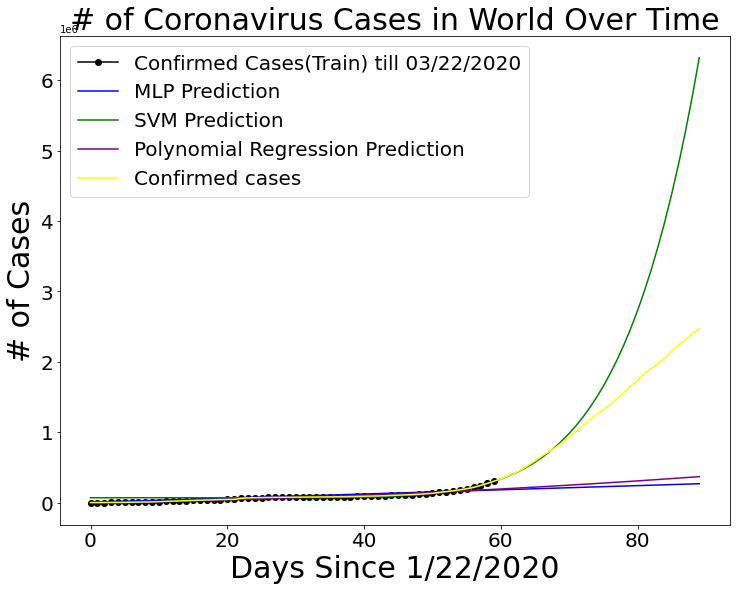

In [ ]:
plot_prediction(world_cases, train_dates, future_forcast, mlp_pred_country, pred_svm_country, poly_pred_country, country_name = 'World')